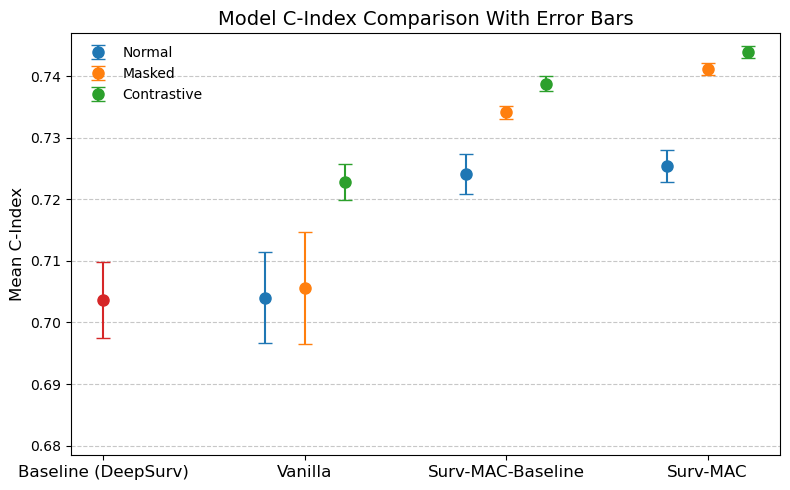

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
clusters = ["Baseline (DeepSurv)", "Vanilla", "Surv-MAC-Baseline", "Surv-MAC"]
methods = ["normal", "masked", "contrastive"]

means = {
    "normal":      [0.7040547997142887, 0.7241851086020238, 0.7254864402497297],
    "masked":      [0.7056628371780553, 0.7341783474224579, 0.7411100905911893],
    "contrastive": [0.7228260345728009, 0.7387783484072452, 0.7440067790288336],
}

stds = {
    "normal":      [0.007429499678352377, 0.00324844908378262, 0.002602222021900509],
    "masked":      [0.009079593796407857, 0.0010437355721894027, 0.0009734863634508684],
    "contrastive": [0.0029999885539129124, 0.0012282236360161337, 0.000992163990740092],
}

colors = {"normal": "C0", "masked": "C1", "contrastive": "C2"}

baseline_mean = 0.7036316775979657
baseline_std  = 0.00622695317385143

x = np.arange(len(clusters))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))

# Baseline (DeepSurv) cluster
ax.errorbar(
    x=0,
    y=baseline_mean,
    yerr=baseline_std,
    fmt='o',
    capsize=5,
    markersize=8,
    color='C3',
)

# Other methods on clusters 1,2,3
x_base = np.arange(1, len(clusters))
for i, method in enumerate(methods):
    xs = x_base + (i - 1) * width
    for j, xi in enumerate(xs):
        mean = means[method][j]
        std  = stds[method][j]
        label = method.capitalize() if j == 0 else None
        ax.errorbar(
            x=xi,
            y=mean,
            yerr=std,
            fmt='o',
            capsize=5,
            markersize=8,
            color=colors[method],
            ecolor=colors[method],
            label=label
        )

# Tidy up axes
ax.set_xticks(x)
ax.set_xticklabels(clusters, fontsize=12)
# Determine y-limits as ±3*STD around all means
all_means = [baseline_mean] + [m for method in methods for m in means[method]]
all_stds  = [baseline_std]  + [s for method in methods for s in stds[method]]
ymin = min(m - 3 * s for m, s in zip(all_means, all_stds))
ymax = max(m + 3 * s for m, s in zip(all_means, all_stds))
ax.set_ylim(ymin, ymax)

ax.set_ylabel("Mean C-Index", fontsize=12)
ax.set_title("Model C-Index Comparison With Error Bars", fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper left', frameon=False)

plt.tight_layout()
plt.show()
